In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [26]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/data-preprocess.csv')
X = pd.read_csv('data/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
dataset['Cluster'] = kmeans.fit_predict(dataset[['Complexity', 'Time', 'Cost']] )

In [28]:
# dataset.to_csv('trest.csv', index=False)

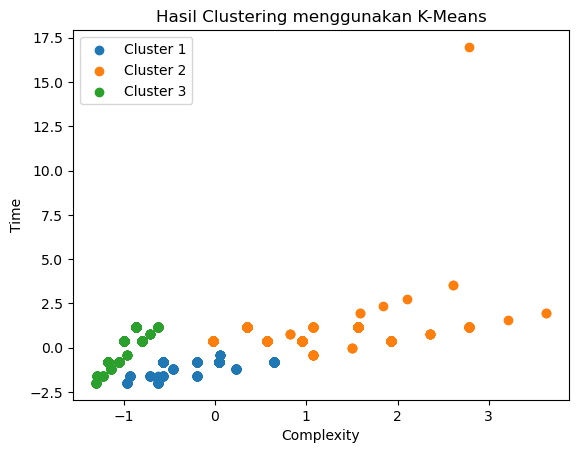

In [29]:
for cluster_num in range(3):
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    plt.scatter(
        # cluster_data['Complexity'], 
        cluster_data['Cost'], 
        cluster_data['Time'], 
        label=f'Cluster {cluster_num + 1}')

plt.xlabel('Complexity')
plt.ylabel('Time')
plt.legend()
plt.title('Hasil Clustering menggunakan K-Means')
plt.show()

In [30]:
score_avg = silhouette_score(X, dataset['Cluster'])
print(f"Score: {score_avg}")

Score: 0.48418820985717925


In [31]:
dataset = dataset.sort_values(by=['Cluster', 'Complexity', 'Time', 'Cost'], ascending=[True, True, True, True])

dataset['Rank'] = dataset.groupby('Cluster').cumcount() + 1

In [32]:
range_complexity = dataset.groupby('Cluster')['Complexity'].agg([min, max])
range_time = dataset.groupby('Cluster')['Time'].agg([min, max])
range_cost = dataset.groupby('Cluster')['Cost'].agg([min, max])

In [33]:
range_complexity

,min,max
Cluster,,
0,-0.023581,1.197458
1,-1.244620,1.197458
2,-1.244620,-1.244620


In [34]:
range_time

,min,max
Cluster,,
0,-1.986636,-0.405723
1,-0.405723,16.984319
2,-1.986636,1.175190


In [35]:
range_cost

,min,max
Cluster,,
0,-0.968574,0.650333
1,-0.019140,3.632529
2,-1.309396,-0.627751
